# Quick EDA on Top1000 overall rank runners

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [41]:
df = pd.read_csv('input/marathon_results_2016.csv')

all_runners = df
top1000_runners = df[0:1000]

runners = top1000_runners

In [42]:
all_runners.describe()

,Age,Overall,Gender,Division
count,26630.000000,26630.000000,26630.000000,26630.000000
mean,42.514044,13314.764176,6707.085242,1613.305896
std,11.347955,7687.226481,3928.246611,1443.420260
min,18.000000,1.000000,1.000000,1.000000
25%,34.000000,6658.250000,3329.000000,510.000000
50%,43.000000,13314.500000,6657.500000,1180.000000
75%,51.000000,19971.750000,9986.000000,2198.000000
max,83.000000,26629.000000,14463.000000,5946.000000


In [43]:
top1000_runners.head(5)

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


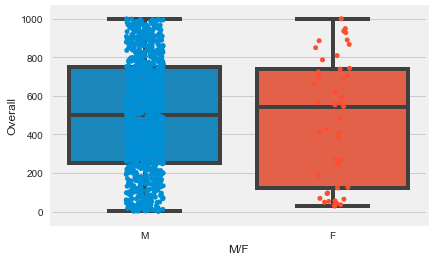

In [44]:
ax = sns.boxplot(x="M/F", y="Overall", data=runners)
ax = sns.stripplot(x="M/F", y="Overall", data=runners, jitter=True, edgecolor="gray")

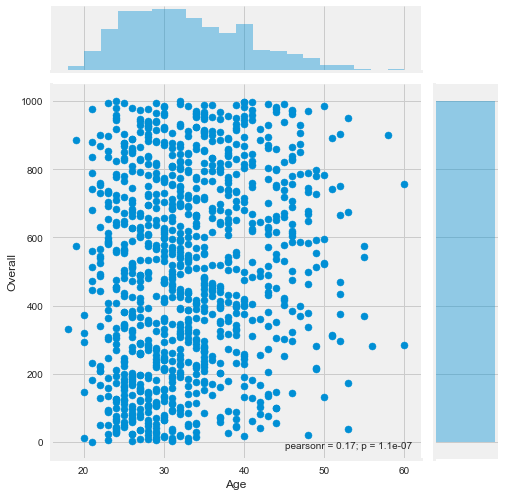

In [45]:
sns.jointplot(x="Age", y="Overall", data=runners, size=7)

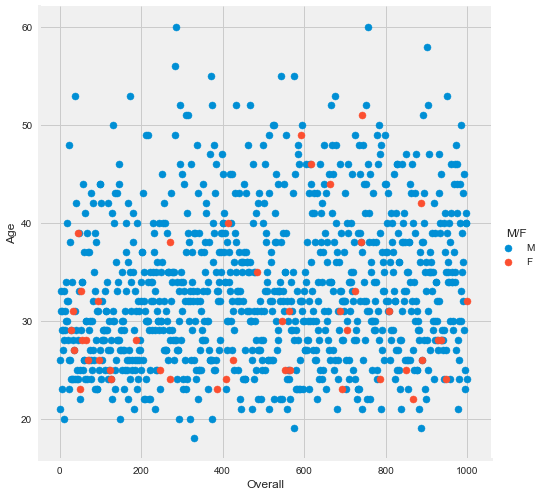

In [46]:
sns.FacetGrid(runners, hue="M/F", size=7) \
  .map(plt.scatter, "Overall", "Age") \
  .add_legend()

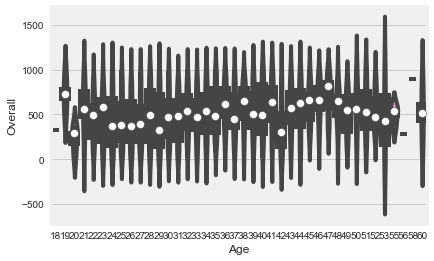

In [58]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x="Age", y="Overall", data=runners, size=6)

In [48]:
# Helper function
# Credit: https://www.kaggle.com/drgilermo
# Ref: https://www.kaggle.com/drgilermo/d/rojour/boston-results/negative-split-and-the-wall

def time_to_min(string):
    if string is not '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + np.true_divide(sec,60)
        return time
    else:
        return -1

print(time_to_min(df.loc[1,'Pace']))

5.1


# Pace in minutes Histogram

In [55]:
print(runners.select_dtypes(include=['object']).columns.values)

['Bib' 'Name' 'M/F' 'City' 'State' 'Country' 'Citizen' 'Unnamed: 8' '5K'
 '10K' '15K' '20K' 'Half' '25K' '30K' '35K' '40K' 'Pace' 'Proj Time'
 'Official Time']


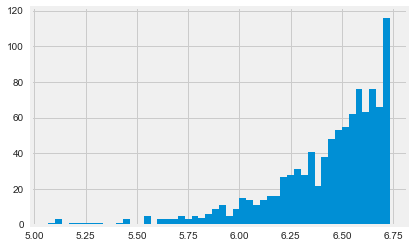

In [61]:
pace_to_min = runners['Pace'].apply(lambda x: time_to_min(x))
pace_to_min.hist(bins=50)

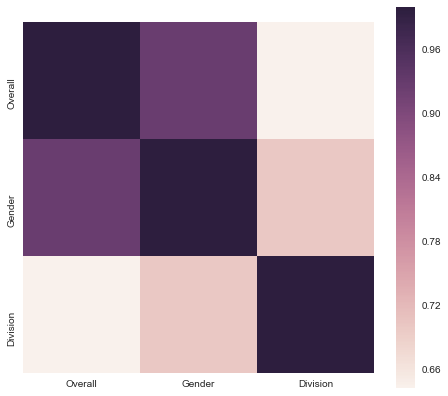

In [60]:
corr = runners.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, vmax=1, square=True)